In [2]:
import sys,os,warnings,random #,pygmt
import numpy as np
import scipy.interpolate as interpolate
import datetime
import re,random
from datetime import timedelta
import matplotlib.pyplot as plt 
#from mpl_toolkits.basemap import Basemap
%matplotlib nbagg
import pandas as pd
import tensorflow as tf
sys.path.append('/home/giacomo/Documents/Denoiser_GPS/sharing_gratsid_tf_in_development')
sys.path.append('/home/giacomo/Documents/CODE_DEFINITIVO/')
from Functions_for_animations import *
from CMC_functions import *
from gratsid_tf_gpu_functions_SHARED import *
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

Enter the root directory folder: /home/giacomo/Documents/
Directory found: /home/giacomo/Documents/Denoiser_GPS/sharing_gratsid_tf_in_development
Num GPUs Available:  0
TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


2023-08-02 19:00:24.408690: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-08-02 19:00:24.408712: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: giacomo-Z590-AORUS-MASTER
2023-08-02 19:00:24.408715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: giacomo-Z590-AORUS-MASTER
2023-08-02 19:00:24.408845: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.125.6
2023-08-02 19:00:24.408856: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.125.6
2023-08-02 19:00:24.408859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 525.125.6


In [2]:
cd='/Users/giacomo/Documents/PhD/Papers/GNSS_DENOISER/Chile'
cd_saving=cd+'/Stations_GRATSID/'
#conversion_Nevada(cd,cd_saving)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/giacomo/Documents/PhD/Papers/GNSS_DENOISER/Chile/Stations'

### Set input_length and position

In [5]:
input_length=31
to_end=16
position=input_length-to_end
print('The input_length is: ',input_length,' The position is: ',position)

The input_length is:  31  The position is:  15


### Period of investigation ###

In [6]:
import datetime
t = np.arange(datetime.datetime(2000,1,1), datetime.datetime(2023,1,1), timedelta(days=1)).astype(datetime.datetime)

### Folder of data  and  Folder of the DL models

In [7]:
cd='/home/giacomo/Documents/Serpelloni_data/NEW/resi/'
save_folder='/home/giacomo/Documents/Serpelloni_data/NEW/resi_Filtered_'+str(input_length)+'_'+str(position)
#cd='/home/giacomo/Documents/Cascadia/Stations_GRATSID'
#save_folder='/home/giacomo/Documents/Cascadia/Filtered_'+str(input_length)+'_'+str(position)

if not os.path.exists(save_folder):
    os.makedirs(save_folder)
    print(f"Folder '{save_folder}' created.")
else:
    print(f"Folder '{save_folder}' already exists.")

Folder '/home/giacomo/Documents/Serpelloni_data/NEW/resi_Filtered_31_15' already exists.


In [8]:
cd_step='/home/giacomo/Documents/Serpelloni_data/NEW/ats_para/'
cd_base='/home/giacomo/Documents/S_NEW'
cd_coord='/home/giacomo/Documents/Serpelloni_data/NEW'
suffix='.resi.cgps_raw.unflt.clean.iqrx3'
#suffix='.txt'

#################################### Flags ####################################
Use_steps_flag=True
Remove_outliers_Flag=True
gratsid_flag=False
exp_flag=False
alpha = 2.71 # base of the exponential weighting
coordinates_flag=True
coord_file=cd_coord+'/'+'station_coordinatesN.txt'

if Use_steps_flag==True and gratsid_flag==True:
    cd='/Users/giacomo/Documents/PhD/Papers/GNSS_DENOISER/Bobby'
    file_coord=cd+'/stations_coordinates.txt'
    file_step=cd+'/steps.txt'
    earthquakes_file=cd+'/Earthquakes_USGS.txt'
    df_stepsAC,df_stepsEC=create_step_file(cd,file_coord,file_step,earthquakes_file,save_Flag=False)

In [9]:
componentsT=['E','N','U'] 
#### Choose components ####
indC=[0,1,2] #,2
components=list(np.array(componentsT)[indC])
print('You are using these components: ',np.array(componentsT)[indC])

You are using these components:  ['E' 'N' 'U']


### Gratsid Options

In [10]:
options = generate_options()
options['nsols'] = 2 # Number of solutions / number of convergences
options['fractional_tolerance'] = 0.01 # Solution must increase by this fraction
options['max_TOs'] = 25 # Max number of Transient Onsets
options['verbose'] = 0
options['TO_types'] = [0,3] #no transients, 0 heavy-side
use_known_steps =0   ## make 0 if you want to run without the known steps (faster)

### Loop

In [ ]:
loop_for_apply_filter(cd,cd_base,save_folder,t,components,input_length,position,suffix,cd_step,step_derivative=1, \
    Remove_outliers_Flag=Remove_outliers_Flag,gratsid_flag=gratsid_flag,options_gratsid = options,exp_flag=exp_flag,alpha = alpha, \
                      Use_steps_flag=Use_steps_flag,coordinates_flag=coordinates_flag,coord_file=coord_file)

You are using these components:  ['E', 'N', 'U']
TEIS_GPS 0
There are some steps
Outliers removed are the: 0.0 %
Apply the denoiser model


2023-07-24 14:06:58.487824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TEIT_GPS 1
Outliers removed are the: 0.0 %
Apply the denoiser model
TEJH_GPS 2
Outliers removed are the: 0.0 %
Apply the denoiser model
TELA_GPS 3
There are some steps
Outliers removed are the: 0.015192950470975575 %
Apply the denoiser model
TELG_GPS 4
Outliers removed are the: 0.0 %
Apply the denoiser model
TELI_GPS 5
There are some steps
Outliers removed are the: 0.029994001199753484 %
Apply the denoiser model
TEM9_GPS 6
Outliers removed are the: 0.0 %
Apply the denoiser model
TEMB_GPS 7
Outliers removed are the: 0.0 %
Apply the denoiser model
TEME_GPS 8
Outliers removed are the: 0.0 %
Apply the denoiser model
TEMP_GPS 9
There are some steps
Outliers removed are the: 0.0 %
Apply the denoiser model
TENC_GPS 10
There are some steps
Outliers removed are the: 0.0 %
Apply the denoiser model
TENE_GPS 11
Outliers removed are the: 0.0 %
Apply the denoiser model
TEOL_GPS 12
There are some steps
Outliers removed are the: 0.0 %
Apply the denoiser model
TEOS_GPS 13
Outliers removed are the: 0.0 

### Plot

<IPython.core.display.Javascript object>


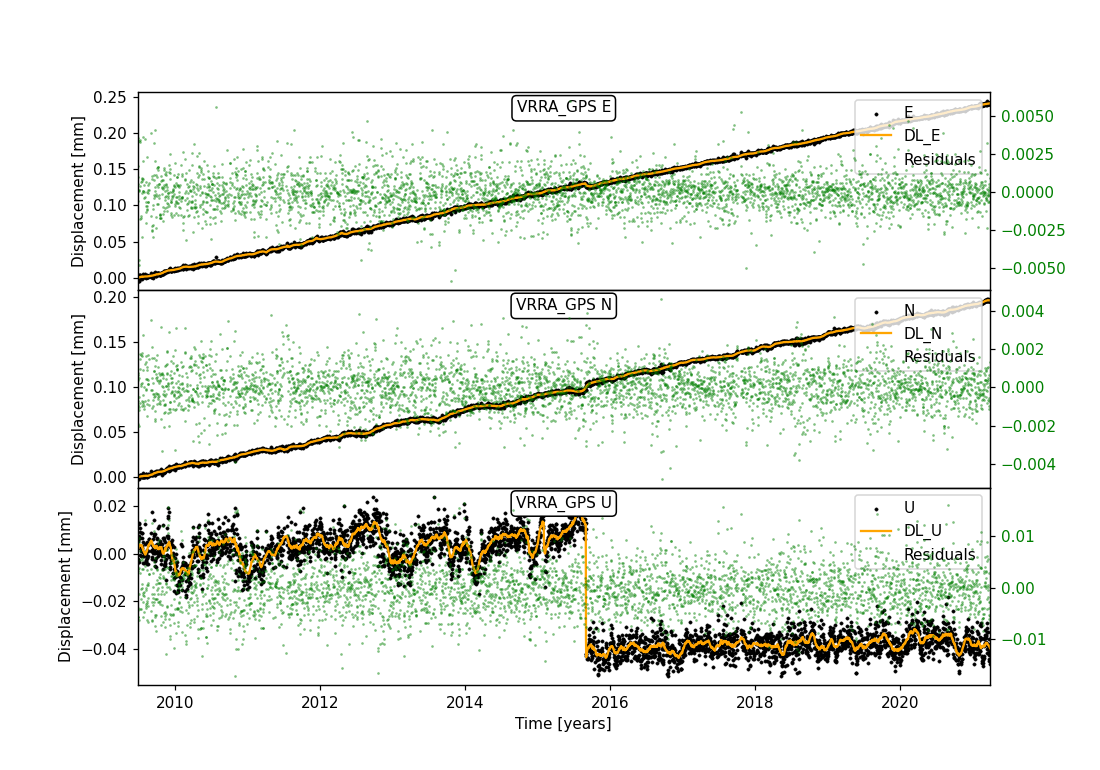

In [82]:
list_stationsS=id_names_txt(save_folder)
n_stations=1
stations_to_plot=random.sample(list_stationsS,n_stations)
#station=stations_to_plot[0]

#position=29
station=stations_to_plot[0]
#station='0267_GPS'

namesT=[]
if gratsid_flag==True and exp_flag==True: 
    for c in components:
        namesT.append([c,'DL_'+c,'EMV_'+c,'GrAtSiD_'+c])
else:
    for c in components:
        namesT.append([c,'DL_'+c])

names = [item for sublist in namesT for item in sublist]
names.insert(0, 'YYMMDD') 
df_Filterd = pd.read_csv(save_folder+'/'+station+'.txt', delim_whitespace=True,header=None,on_bad_lines='skip',names=names)

  
fig,ax=plt.subplots(len(components),1,figsize=(10,7))
fig.subplots_adjust(hspace=0,wspace=0.2)
data=df_Filterd.values[:,1:]
df_Filterd['YYMMDD']= pd.to_datetime(df_Filterd['YYMMDD']).astype('datetime64[ns]')
df_Filterd['YYMMDD'] = pd.to_datetime(df_Filterd["YYMMDD"]) 

if gratsid_flag==True and exp_flag==True:
    k=0
    if len(components)==1:
        ax.scatter(df_Filterd.YYMMDD,data[:,0+k],s=5,color='k',linewidth=0.2,label=df_Filterd.columns[k+1])
        ax.plot(df_Filterd.YYMMDD,data[:,1+k],label=df_Filterd.columns[k+2],color='orange')
        ax.plot(df_Filterd.YYMMDD,data[:,2+k],label=df_Filterd.columns[k+3],color='red')
        ax.plot(df_Filterd.YYMMDD,data[:,3+k],label=df_Filterd.columns[k+4],color='y')
        #ax[i].plot(df_Filterd.YYMMDD,data[:,4+k],label=df_Filterd.columns[k+5],color='c')
        k+=4
        ax.set_xlim(df_Filterd.YYMMDD.iloc[0],df_Filterd.YYMMDD.iloc[-1])
        ax.legend(loc='lower left')
        ax.set_ylabel('Displacement [mm]')  
        ax.text(.5,.94,str(station)+' '+components[0],horizontalalignment='center',
                 transform=ax.transAxes,fontsize=10,\
                 bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'))
        ax.set_xlabel('Time [years]')
    
    else:    
        for i in range(len(components)):
            ax[i].scatter(df_Filterd.YYMMDD,data[:,0+k],s=5,color='k',linewidth=0.2,label=df_Filterd.columns[k+1])
            ax[i].plot(df_Filterd.YYMMDD,data[:,1+k],label=df_Filterd.columns[k+2],color='orange')
            ax[i].plot(df_Filterd.YYMMDD,data[:,2+k],label=df_Filterd.columns[k+3],color='red')
            ax[i].plot(df_Filterd.YYMMDD,data[:,3+k],label=df_Filterd.columns[k+4],color='y')
            #ax[i].plot(df_Filterd.YYMMDD,data[:,4+k],label=df_Filterd.columns[k+5],color='c')
            k+=4
            ax[i].set_xlim(df_Filterd.YYMMDD.iloc[0],df_Filterd.YYMMDD.iloc[-1])
            ax[i].legend(loc='lower left')
            ax[i].set_ylabel('Displacement [mm]')  
            ax[i].text(.5,.94,str(station)+' '+components[i],horizontalalignment='center',
                 transform=ax[i].transAxes,fontsize=10,\
                 bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'))
            ax[i].set_xlabel('Time [years]')
else:
    k=0
    if len(components)==1:
        ax.scatter(df_Filterd.YYMMDD,data[:,0+k],s=5,color='k',linewidth=0.2,label=df_Filterd.columns[k+1])
        ax.plot(df_Filterd.YYMMDD,data[:,1+k],label=df_Filterd.columns[k+2],color='orange')
        #ax[i].plot(df_Filterd.YYMMDD,data[:,4+k],label=df_Filterd.columns[k+5],color='c')
        k+=2
        ax.set_xlim(df_Filterd.YYMMDD.iloc[0],df_Filterd.YYMMDD.iloc[-1])
        ax.legend(loc='lower left')
        ax.set_ylabel('Displacement [mm]')  
        ax.text(.5,.94,str(station)+' '+components[0],horizontalalignment='center',
                 transform=ax.transAxes,fontsize=10,\
                 bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'))
        ax.set_xlabel('Time [years]')
        ax.axvline(x=List_steps[i][1])
    else:
        for i in range(len(components)):
            axe=ax[i].twinx()
            ax[i].scatter(df_Filterd.YYMMDD,data[:,0+k],s=5,color='k',linewidth=0.2,label=df_Filterd.columns[k+1])
            ax[i].plot(df_Filterd.YYMMDD,data[:,1+k],label=df_Filterd.columns[k+2],color='orange')
            #ax[i].plot(df_Filterd.YYMMDD,data[:,4+k],label=df_Filterd.columns[k+5],color='c')
            ax[i].set_xlim(df_Filterd.YYMMDD.iloc[0],df_Filterd.YYMMDD.iloc[-1])
            #ax[i].legend(loc='lower left')
            ax[i].set_ylabel('Displacement [mm]')  
            ax[i].text(.5,.90,str(station)+' '+components[i],horizontalalignment='center',
                 transform=ax[i].transAxes,fontsize=10,\
                 bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'))
            ax[i].set_xlabel('Time [years]')
            axe.scatter(df_Filterd.YYMMDD,data[:,0+k]-data[:,1+k],s=2,color='g',linewidth=0.2,alpha=0.5,label='Residuals')

            #ax[i].axvline(x=List_steps[i][1])
            axe.tick_params(axis='y', labelcolor='g')
      
            # Add legend for both axes
            lines, labels = ax[i].get_legend_handles_labels()
            lines2, labels2 = axe.get_legend_handles_labels()
            ax[i].legend(lines + lines2, labels + labels2, loc='upper right')
            k+=2 

In [83]:
fig.savefig('/home/giacomo/Documents/Serpelloni_data/NEW/Figures/Ex_'+str(station)+'.pdf')

### Run CMF

In [12]:
cd='/home/giacomo/Documents/Serpelloni_data/NEW/resi/'
save_folder_CMF='/home/giacomo/Documents/Serpelloni_data/NEW/resi_Filtered_'+str(input_length)+'_'+str(position)+'_CMF'

if not os.path.exists(save_folder_CMF):
    os.makedirs(save_folder_CMF)
    print(f"Folder '{save_folder_CMF}' created.")
else:
    print(f"Folder '{save_folder_CMF}' already exists.")
    
list_stations=id_names_txt(save_folder)

Folder '/home/giacomo/Documents/Serpelloni_data/NEW/resi_Filtered_31_15_CMF' already exists.


In [13]:
##### Coordinates file #####
#dfC='/home/giacomo/Documents/Cascadia/stations_coordinates.txt' 
dfC='/home/giacomo/Documents/Serpelloni_data/NEW/stations_coordinates.txt'
dfC = pd.read_csv(dfC, delimiter=',',names=['station','latitude','longitude','altitude'],header=None)

#save_folder='/home/giacomo/Documents/Cascadia/Filtered_31_28'
list_stations=id_names_txt(save_folder)
## Folder of stations to use ##
 
##### Components #####
components=['E','N','U'] #'U'

gratsid_flag=False #False
exp_flag=False #False
namesT=[]
if gratsid_flag==True and exp_flag==True: 
    for c in components:
        namesT.append([c,'DL_'+c,'EMV_'+c,'GrAtSiD_'+c])
else:
    for c in components:
        namesT.append([c,'DL_'+c])
names = [item for sublist in namesT for item in sublist]
names.insert(0, 'YYMMDD') 

#CMF_folder='/home/giacomo/Documents/Cascadia/'
##### Run CMF #####
thr_distance=500 #distance threeshold
##### You want to base your CMF on the DL model or on GrAtSiD #####
Reference='DL'#'GrAtSiD'

for station in list_stations[:]:
    print(station)
    dfCMF=CMF(save_folder+'/'+str(station)+'.txt',components,dfC,list_stations,save_folder,thr_distance,names,Reference,Distance_file=None,save_flag=True,save_folder=save_folder_CMF)            


0137_GPS
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(341, 7) (3, 341) (3, 341)
Finished
0208_GPS
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(617, 7) (3, 617) (3, 617)
Finished
0256_GPS
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(6206, 7) (3, 6206) (3, 6206)
Finished
0257_GPS
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(6196, 7) (3, 6196) (3, 6196)
Finished
0258_GPS
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(5709, 7) (3, 5709) (3, 5709)
Finished
0259_GPS
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(5985, 7) (3, 5985) (3, 5985)
Finished
0261_GPS
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Com

KeyboardInterrupt: 

### Plot some examples

<IPython.core.display.Javascript object>


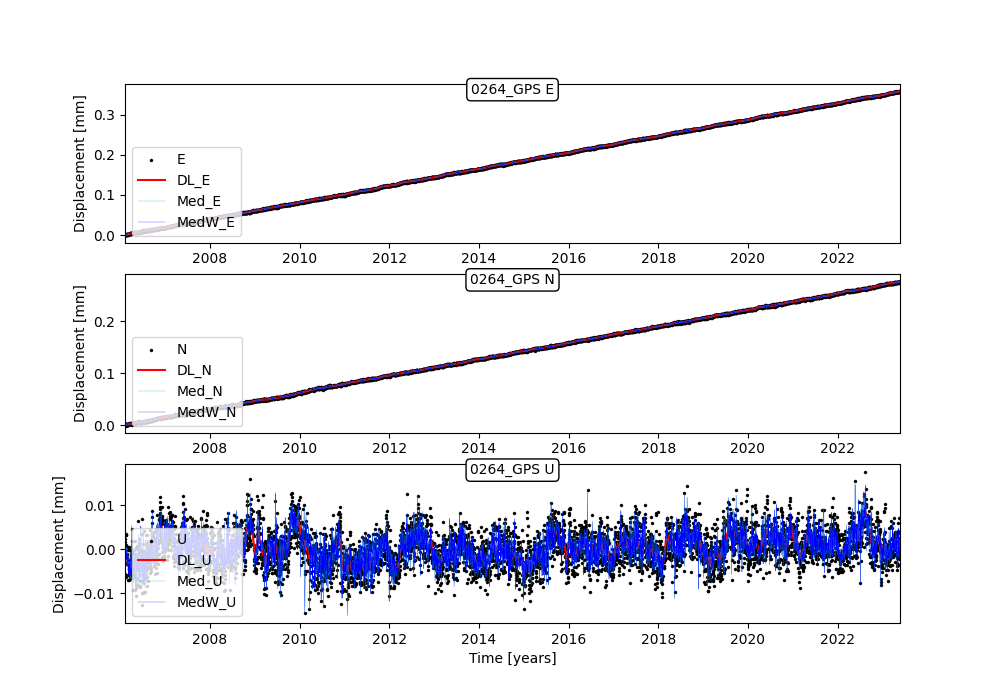

In [15]:
list_stationsS=id_names_txt(save_folder_CMF)
n_stations=1
stations_to_plot=random.sample(list_stationsS,n_stations)
#station=stations_to_plot[0]

#position=29
station=stations_to_plot[0]
#station='0267_GPS'

namesT=[]
names_CMF=[]
names_CMFW=[]
gratsid_flag=False #False
exp_flag=False #False

if gratsid_flag==True and exp_flag==True: 
    for c in components:
        namesT.append([c,'DL_'+c,'EMV_'+c,'GrAtSiD_'+c])
        names_CMF.append('Med_'+c)
        names_CMFW.append('MedW_'+c)
else:
    for c in components:
        namesT.append([c,'DL_'+c])
        names_CMF.append('Med_'+c)
        names_CMFW.append('MedW_'+c)

names = [item for sublist in namesT for item in sublist]
names=names+names_CMF+names_CMFW
names.insert(0, 'YYMMDD') 
df_Filterd = pd.read_csv(save_folder_CMF+'/'+station+'.txt', delim_whitespace=True,header=None,on_bad_lines='skip',names=names)

  
fig,ax=plt.subplots(len(components),1,figsize=(10,7))
fig.subplots_adjust(hspace=0.2,wspace=0.2)
data=df_Filterd.values[:,1:]
df_Filterd['YYMMDD']= pd.to_datetime(df_Filterd['YYMMDD']).astype('datetime64[ns]')
df_Filterd['YYMMDD'] = pd.to_datetime(df_Filterd["YYMMDD"]) 


if len(components)==1:
    c=0
    ax.scatter(df_Filterd.YYMMDD,df_Filterd[components[c]],s=5,color='k',linewidth=0.2,label=components[c])
    #ax.plot(df_Filterd.YYMMDD,df_Filterd['GrAtSiD_'+components[c]],label='GrAtSiD_'+components[c],color='orange')
    ax.plot(df_Filterd.YYMMDD,df_Filterd['DL_'+components[c]],label='DL_'+components[c],color='red')
    ax.plot(df_Filterd.YYMMDD,df_Filterd[components[c]]-df_Filterd['Med_'+components[c]],label='Med_'+components[c],color='c')
    ax.plot(df_Filterd.YYMMDD,df_Filterd[components[c]]-df_Filterd['MedW_'+components[c]],label='MedW_'+components[c],color='b')
    #ax[i].plot(df_Filterd.YYMMDD,data[:,4+k],label=df_Filterd.columns[k+5],color='c')
    ax.set_xlim(df_Filterd.YYMMDD.iloc[0],df_Filterd.YYMMDD.iloc[-1])
    ax.legend(loc='lower left')
    ax.set_ylabel('Displacement [mm]')  
    ax.text(.5,.94,str(station)+' '+components[0],horizontalalignment='center',
             transform=ax.transAxes,fontsize=10,\
             bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'))
    ax.set_xlabel('Time [years]')
    
else:    
    for c in range(len(components)):
        ax[c].scatter(df_Filterd.YYMMDD,df_Filterd[components[c]],s=5,color='k',linewidth=0.2,label=components[c])
        #ax[c].plot(df_Filterd.YYMMDD,df_Filterd['GrAtSiD_'+components[c]],label='GrAtSiD_'+components[c],color='orange')
        ax[c].plot(df_Filterd.YYMMDD,df_Filterd['DL_'+components[c]],label='DL_'+components[c],color='red')
        ax[c].plot(df_Filterd.YYMMDD,df_Filterd[components[c]]-df_Filterd['Med_'+components[c]],label='Med_'+components[c],color='c',linewidth=0.2)
        ax[c].plot(df_Filterd.YYMMDD,df_Filterd[components[c]]-df_Filterd['MedW_'+components[c]],label='MedW_'+components[c],color='b',linewidth=0.2)
        #ax[i].plot(df_Filterd.YYMMDD,data[:,4+k],label=df_Filterd.columns[k+5],color='c')
        k+=4
        ax[c].set_xlim(df_Filterd.YYMMDD.iloc[0],df_Filterd.YYMMDD.iloc[-1])
        ax[c].legend(loc='lower left')
        ax[c].set_ylabel('Displacement [mm]')  
        ax[c].text(.5,.94,str(station)+' '+components[c],horizontalalignment='center',
             transform=ax[c].transAxes,fontsize=10,\
             bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'))
        ax[c].set_xlabel('Time [years]')


### Different threshold distances

<IPython.core.display.Javascript object>


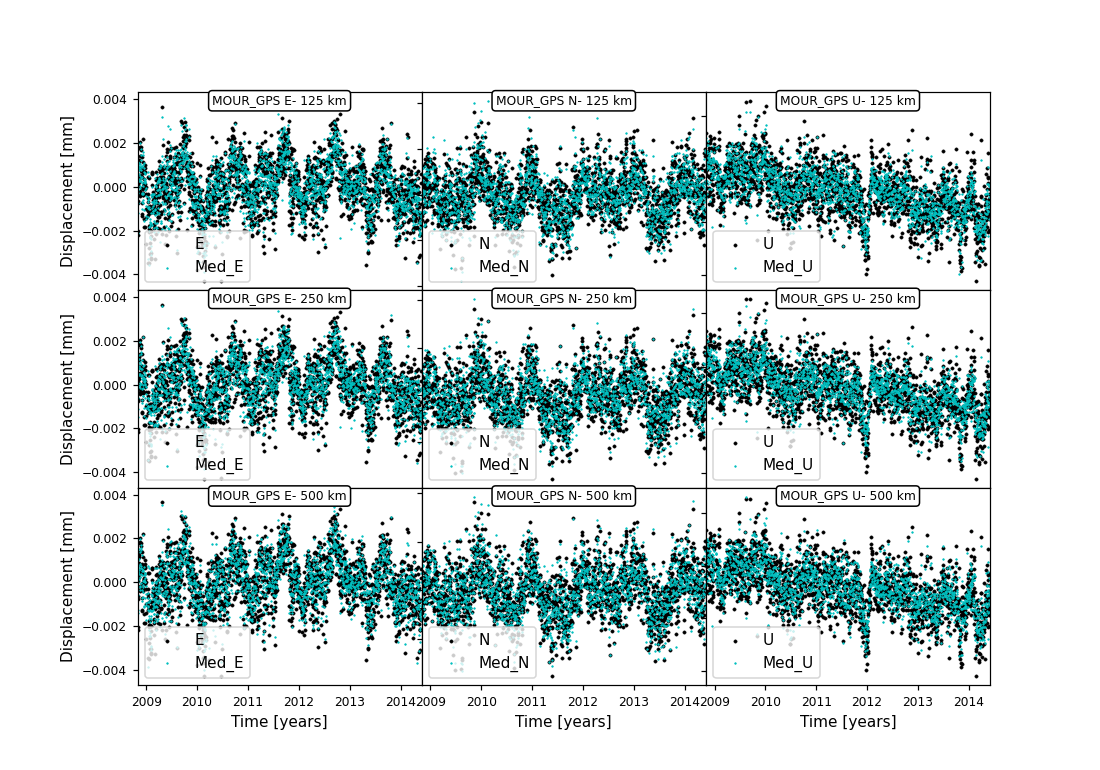

Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(2001, 7) (3, 2001) (3, 2001)
Finished
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(2001, 7) (3, 2001) (3, 2001)
Finished
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(2001, 7) (3, 2001) (3, 2001)
Finished


In [86]:
from scipy.stats import linregress

##### Coordinates file #####
dfC='/home/giacomo/Documents/Serpelloni_data/NEW/stations_coordinates.txt'
#dfC='/home/giacomo/Documents/Cascadia/stations_coordinates.txt' #'/home/giacomo/Documents/Serpelloni_data/NEW/stations_coordinates.txt'

dfC = pd.read_csv(dfC, delimiter=',',names=['station','latitude','longitude','altitude'],header=None)

## Folder of stations to use ##
 
##### Components #####
components=['E','N','U'] 

gratsid_flag=False 
exp_flag=False
namesT=[]
if gratsid_flag==True and exp_flag==True: 
    for c in components:
        namesT.append([c,'DL_'+c,'EMV_'+c,'GrAtSiD_'+c])
else:
    for c in components:
        namesT.append([c,'DL_'+c])
names = [item for sublist in namesT for item in sublist]
names.insert(0, 'YYMMDD') 

save_folder='/home/giacomo/Documents/Serpelloni_data/NEW/resi_Filtered_31_15'
list_stations=id_names_txt(save_folder)
#CMF_folder='/home/giacomo/Documents/Cascadia/Filtered_31_28'
##### Run CMF #####
##### You want to base your CMF on the DL model or on GrAtSiD #####
Reference='DL' #'GrAtSiD' 
which_median='Med_'

n_stations=1
stations_to_plot=random.sample(list_stations,n_stations)
#station=stations_to_plot[0]

#position=29
station=stations_to_plot[0]


thr_distances=[125,250,500] #,500,750,1000   ,750,1000

fig,axes=plt.subplots(len(thr_distances),len(components),figsize=(10,7))
fig.subplots_adjust(hspace=0,wspace=0)

for ii in range(len(thr_distances)):
    thr_distance=thr_distances[ii]
    dfCMF=CMF(save_folder+'/'+str(station)+'.txt',components,dfC,list_stations,save_folder,thr_distance,names,Reference,Distance_file=None,save_flag=False,save_folder=None)         
    data=dfCMF.values[:,1:].astype('float')
    k=0
    df_dates = dfCMF['YYMMDD'].apply(lambda x: x.date())
    days_ago=df_dates[0]-df_dates
    days_ago_as_int=np.array([abs(da.days) for da in days_ago]).astype('int')
    for c in range(len(components)):
        
        trend=linregress(days_ago_as_int,data[:,0+k])
        trend_vector=days_ago_as_int*trend.slope+trend.intercept

        cmf=dfCMF[components[c]]-dfCMF[which_median+components[c]]-trend_vector    
        
        axes[ii,c].scatter(dfCMF.YYMMDD,dfCMF[components[c]]-trend_vector,s=5,color='k',linewidth=0.2,label=components[c])
        axes[ii,c].scatter(dfCMF.YYMMDD,cmf,label=which_median+components[c],s=1,color='c',linewidth=0.5)
        axes[ii,c].set_xlim(dfCMF.YYMMDD.iloc[0],dfCMF.YYMMDD.iloc[-1])
        axes[ii,c].legend(loc='lower left')
       
        axes[ii,c].text(.5,.94,str(station)+' '+components[c]+ '- '+str(thr_distance)+' km',horizontalalignment='center',
                 transform=axes[ii,c].transAxes,fontsize=8,\
                 bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'))  
            
        if ii!=len(thr_distances)-1:
            axes[ii,c].set_xticklabels([])
        else:
            axes[ii,c].tick_params(axis='x', labelsize=8)
            axes[ii,c].set_xlabel('Time [years]')
            
        if c!=0:
            axes[ii,c].set_yticklabels([])
        else:
            axes[ii,c].tick_params(axis='y', labelsize=8)
            axes[ii,c].set_ylabel('Displacement [mm]') 

        if gratsid_flag==True and exp_flag==True:
            k+=2    
        else:
            k+=3
plt.show()

In [87]:
fig.savefig('/home/giacomo/Documents/Serpelloni_data/NEW/Figures/CMF_on_DL_'+str(station)+'.pdf')

In [88]:
soln_folder_path

NameError: name 'soln_folder_path' is not defined

## Correlation matrix

In [94]:
dfC='/home/giacomo/Documents/Serpelloni_data/NEW/stations_coordinates.txt' #'/home/giacomo/Documents/Serpelloni_data/NEW/stations_coordinates.txt'

dfC = pd.read_csv(dfC, delimiter=',',names=['station','latitude','longitude','altitude'],header=None)

save_folder='/home/giacomo/Documents/Serpelloni_data/NEW/resi_Filtered_31_15'
corr=build_correlation_matrix(dfC,save_folder,Reference,names,components,save_flag=False,save_folder=True)
plot_correlation_matrix(corr,save_flag=True,save_folder='/home/giacomo/Documents/Serpelloni_data/NEW/Figures')

0137_GPS


ValueError: Datetime values are not increasing monotonically.

### CMF in some zones

<IPython.core.display.Javascript object>


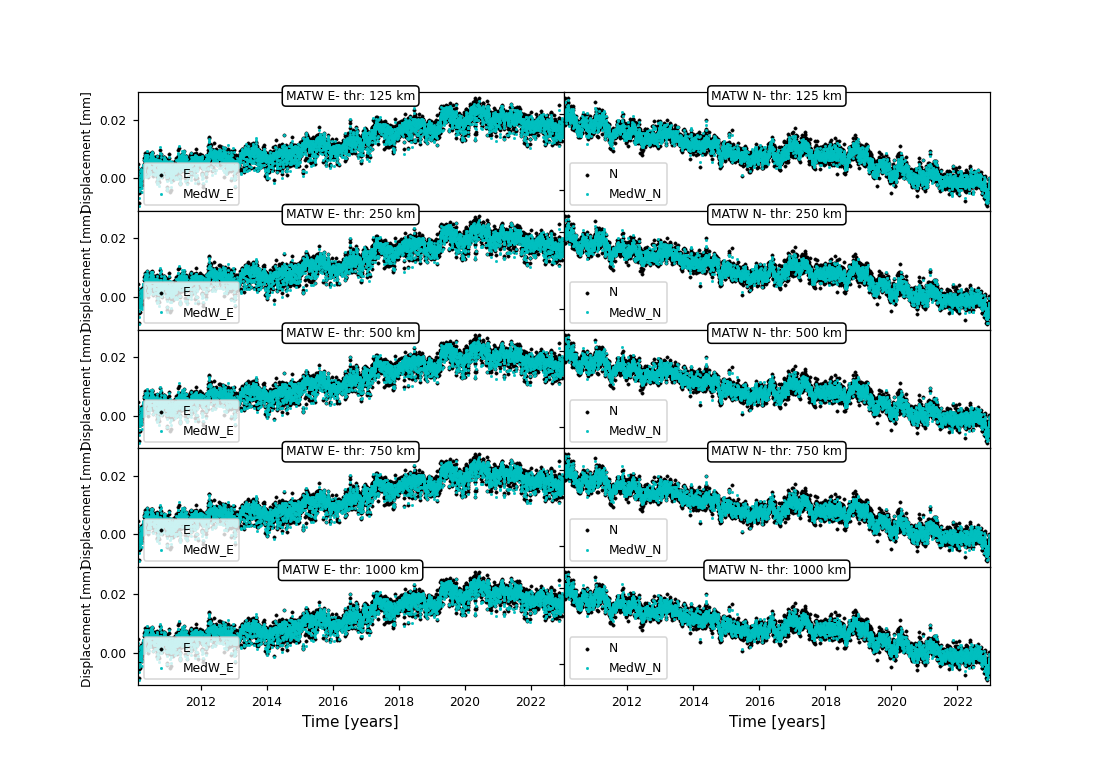

Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(4698, 9) (2, 4698) (2, 4698)
Finished
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(4698, 9) (2, 4698) (2, 4698)
Finished
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(4698, 9) (2, 4698) (2, 4698)
Finished
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(4698, 9) (2, 4698) (2, 4698)
Finished
Calculate distance
Take residuals of close stations
10%
20%
30%
40%
50%
60%
70%
80%
90%
Compute median
(4698, 9) (2, 4698) (2, 4698)
Finished


In [48]:
from scipy.stats import linregress

##### Coordinates file #####
#dfC='/home/giacomo/Documents/Serpelloni_data/NEW/stations_coordinates.txt'
dfC='/home/giacomo/Documents/New_zeland/stations_coordinates.txt' #'/home/giacomo/Documents/Serpelloni_data/NEW/stations_coordinates.txt'

dfC = pd.read_csv(dfC, delimiter=',',names=['station','latitude','longitude','altitude'],header=None)

## Folder of stations to use ##
 
##### Components #####
components=['E','N'] 

gratsid_flag=True 
exp_flag=True
namesT=[]
if gratsid_flag==True and exp_flag==True: 
    for c in components:
        namesT.append([c,'DL_'+c,'EMV_'+c,'GrAtSiD_'+c])
else:
    for c in components:
        namesT.append([c,'DL_'+c])
names = [item for sublist in namesT for item in sublist]
names.insert(0, 'YYMMDD') 

#save_folder='/home/giacomo/Documents/Serpelloni_data/NEW/resi_Filtered_31_15'
save_folder='/home/giacomo/Documents/New_zeland/Filtered_31_28'
list_stations=id_names_txt(save_folder)

##### Run CMF #####
##### You want to base your CMF on the DL model or on GrAtSiD #####
Reference='DL' #'DL' 
which_median='MedW_'

n_stations=1
stations_to_plot=random.sample(list_stations,n_stations)
#station=stations_to_plot[0]

#position=29
station=stations_to_plot[0]


thr_distances=[125,250,500,750,1000] #,500,750,1000

fig,axes=plt.subplots(len(thr_distances),len(components),figsize=(10,7))
fig.subplots_adjust(hspace=0,wspace=0)

for ii in range(len(thr_distances)):
    thr_distance=thr_distances[ii]
    dfCMF=CMF(save_folder+'/'+str(station)+'.txt',components,dfC,list_stations,save_folder,thr_distance,names,Reference,Distance_file=None,save_flag=False,save_folder=None)         
    data=dfCMF.values[:,1:].astype('float')
    k=0
    df_dates = dfCMF['YYMMDD'].apply(lambda x: x.date())
    days_ago=df_dates[0]-df_dates
    days_ago_as_int=np.array([abs(da.days) for da in days_ago]).astype('int')
    for c in range(len(components)):
        
        trend=linregress(days_ago_as_int,data[:,0+k])
        trend_vector=days_ago_as_int*trend.slope+trend.intercept

        cmf=dfCMF[components[c]]-dfCMF[which_median+components[c]] #-trend_vector    
        
        axes[ii,c].scatter(dfCMF.YYMMDD,dfCMF[components[c]],s=5,color='k',linewidth=0.2,label=components[c])
        #axes[ii,c].scatter(dfCMF.YYMMDD,dfCMF[components[c]]-trend_vector,s=5,color='k',linewidth=0.2,label=components[c])
        axes[ii,c].scatter(dfCMF.YYMMDD,cmf,label=which_median+components[c],s=2,color='c',linewidth=0.5)
        axes[ii,c].set_xlim(dfCMF.YYMMDD.iloc[0],dfCMF.YYMMDD.iloc[-1])
        axes[ii,c].legend(loc='lower left',fontsize=8)
       
        axes[ii,c].text(.5,.94,str(station)+' '+components[c]+ '- thr: '+str(thr_distance)+' km',horizontalalignment='center',
                 transform=axes[ii,c].transAxes,fontsize=8,\
                 bbox=dict(facecolor='white', edgecolor='k',boxstyle='round'))  
            
        if ii!=len(thr_distances)-1:
            axes[ii,c].set_xticklabels([])
        else:
            axes[ii,c].tick_params(axis='x', labelsize=8)
            axes[ii,c].set_xlabel('Time [years]')
            
        if c!=0:
            axes[ii,c].set_yticklabels([])
        else:
            axes[ii,c].tick_params(axis='y', labelsize=8)
            axes[ii,c].set_ylabel('Displacement [mm]',fontsize=8) 

        if gratsid_flag==True and exp_flag==True:
            k+=2    
        else:
            k+=3
plt.show()